In [ ]:
import glob

from datasets import *
from features import *
from load import *
from util import *

figsize('inline_short');

In [ ]:
glob.glob(f'{data_dir}/mlsp-2013/*')

[
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp13birdchallenge_documentation.pdf',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset',
  '/Users/danb/hack/bubo/data/mlsp-2013/README.txt',
]

In [ ]:
glob.glob(f'{data_dir}/mlsp-2013/light_data/*')

[
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/CVfolds_2.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/histogram_of_segments.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/rec_id2filename.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/rec_labels_test_hidden.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/sample_submission.csv',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/segment_features.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/light_data/species_list.txt',
]

In [ ]:
glob.glob(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/*')

[
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/CVfolds_2.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/rec_id2filename.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/rec_labels_test_hidden.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/sample_submission.csv',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/species_list.txt',
  '/Users/danb/hack/bubo/data/mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs',
]

In [ ]:
# Boring
# pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/CVfolds_2.txt')[:50]

# Interesting
rec_id_to_filename_df = pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/rec_id2filename.txt')
sample_submission_df = pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/sample_submission.csv')
species_df = pd.read_csv(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/species_list.txt')

# This one has variable numbers of columns, so parse it manually
with open(f'{data_dir}/mlsp-2013/mlsp_contest_dataset/essential_data/rec_labels_test_hidden.txt') as f:
    rec_labels_test_hidden_df = (
        pd.DataFrame(line.rstrip().split(',', 1) for line in f.readlines())
        .T.set_index(0).T  # Pull first row into df col names
    )

In [ ]:
display(
    species_df.shape,
    species_df,
)

(19, 3)

,class_id,code,species
0,0,BRCR,Brown Creeper
1,1,PAWR,Pacific Wren
2,2,PSFL,Pacific-slope Flycatcher
3,3,RBNU,Red-breasted Nuthatch
4,4,DEJU,Dark-eyed Junco
5,5,OSFL,Olive-sided Flycatcher
6,6,HETH,Hermit Thrush
7,7,CBCH,Chestnut-backed Chickadee
8,8,VATH,Varied Thrush
9,9,HEWA,Hermit Warbler


In [ ]:
display(
    rec_id_to_filename_df.shape,
    rec_id_to_filename_df[:10],
)

(645, 2)

,rec_id,filename
0,0,PC1_20090513_050000_0010
1,1,PC1_20090513_070000_0010
2,2,PC1_20090606_050012_0010
3,3,PC1_20090606_070012_0010
4,4,PC1_20090705_050000_0010
5,5,PC1_20090705_070000_0010
6,6,PC1_20090804_050011_0010
7,7,PC1_20090804_070012_0010
8,8,PC1_20100513_043000_0010
9,9,PC1_20100513_043000_0720


In [ ]:
display(
    sample_submission_df.shape,
    sample_submission_df[:10],
)

(6137, 3)

,rec_id,species,probability
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
5,0,5,0
6,0,6,0
7,0,7,0
8,0,8,0
9,0,9,0


In [ ]:
# Test examples are '[labels]' = '?'
display(
    rec_labels_test_hidden_df.shape,
    rec_labels_test_hidden_df[:10],
)

(645, 2)

,rec_id,[labels]
1,0,?
2,1,?
3,2,"11,12"
4,3,None
5,4,?
6,5,10
7,6,?
8,7,?
9,8,None
10,9,None


In [ ]:
# Split train vs. test
train_labels_df = rec_labels_test_hidden_df[lambda df: df['[labels]'] != '?']
test_labels_df = rec_labels_test_hidden_df[lambda df: df['[labels]'] == '?']

In [ ]:
display(
    test_labels_df.shape,
    test_labels_df[:10],
)

(323, 2)

,rec_id,[labels]
1,0,?
2,1,?
5,4,?
7,6,?
8,7,?
11,10,?
13,12,?
18,17,?
23,22,?
28,27,?


In [ ]:
display(
    train_labels_df.shape,
    train_labels_df[:10],
)

(322, 2)

,rec_id,[labels]
3,2,"11,12"
4,3,None
6,5,10
9,8,None
10,9,None
12,11,None
14,13,"15,17"
15,14,None
16,15,None
17,16,None


In [ ]:
# How many train vs. test recordings?
(rec_labels_test_hidden_df
    .assign(group=lambda df: df['[labels]'].map(lambda x: 'test' if x == '?' else 'train'))
    .assign(n=1).groupby('group')['n'].count()
)

group
test     323
train    322
Name: n, dtype: int64

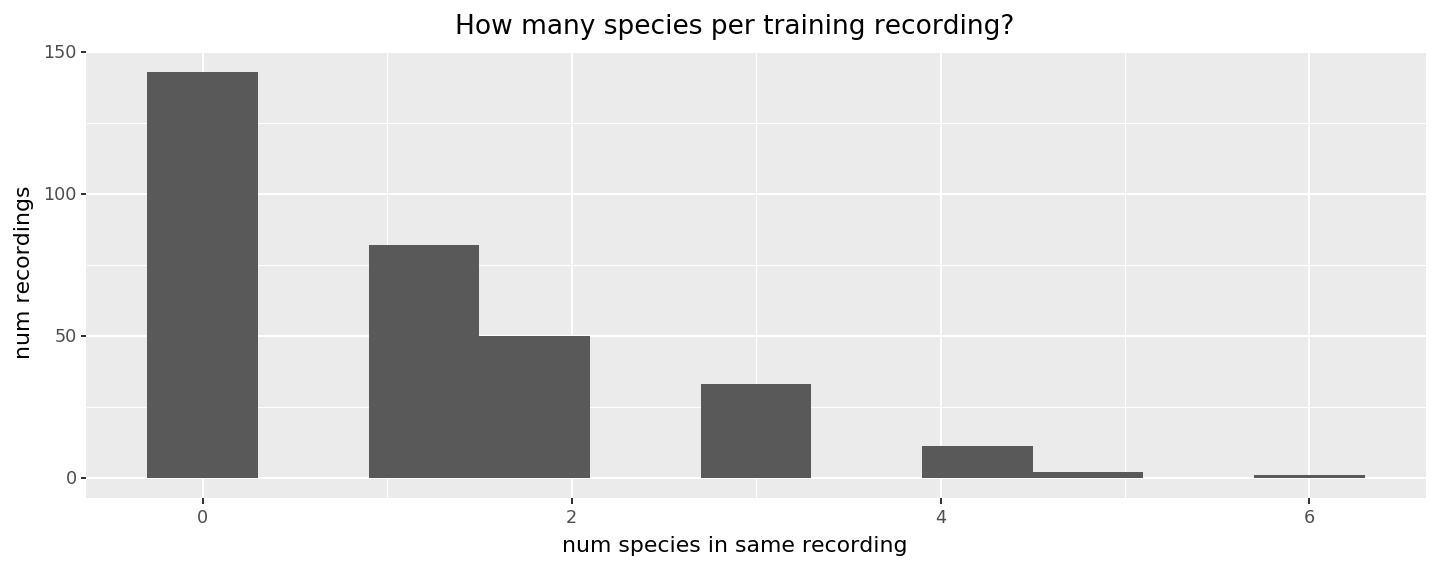

<ggplot: (-9223372036556364309)>

In [ ]:
(train_labels_df
    ['[labels]']
    .fillna('')
    .map(lambda s: [int(x) for x in s.split(',') if x != ''])
    .map(lambda class_ids: len(class_ids))
    .pipe(gghist)
    + xlab('num species in same recording')
    + ylab('num recordings')
    + ggtitle('How many species per training recording?')
)

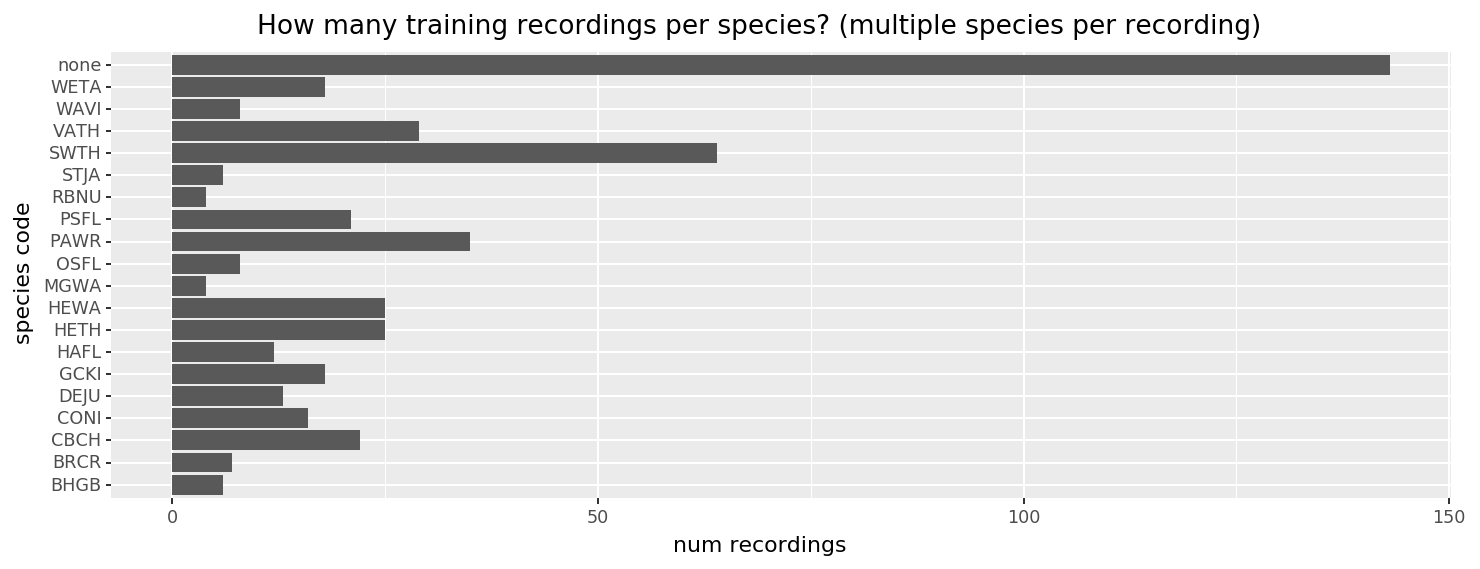

<ggplot: (-9223372036553028590)>

In [ ]:
(train_labels_df
    .fillna({'[labels]': '-1'})
    .astype({'rec_id': 'int'})
    .set_index('rec_id')['[labels]']
    .fillna('')
    .map(lambda s: [int(x) for x in s.split(',') if x != ''])
    .apply(pd.Series).unstack()  # flatmap
    .reset_index(level=0, drop=True)  # Drop 'level' index
    .sort_index().reset_index()  # Sort and reset 'rec_id' index
    .rename(columns={0: 'class_id'})
    .dropna()
    .merge(species_df, how='left', on='class_id').drop(columns=['class_id'])
    .fillna({'code': 'none', 'species': 'none'})
    .pipe(ggplot, aes(x='code'))
    + geom_bar()
    + coord_flip()
    + xlab('species code')
    + ylab('num recordings')
    + ggtitle('How many training recordings per species? (multiple species per recording)')
)

In [ ]:
recs_paths = load_recs_paths(['mlsp-2013'])
display(
    recs_paths.shape,
    recs_paths.groupby('dataset').head(5),
    recs_paths.dataset.value_counts(),
)

(645, 2)

,dataset,path
0,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010.wav
1,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0020.wav
2,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0030.wav
3,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0040.wav
4,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0010.wav


mlsp-2013    645
Name: dataset, dtype: int64

In [ ]:
recs = load_recs_data(
    (recs_paths
        # .sample(1000)  # For faster dev
    ),
    # FIXME pickling AudioSegment's across processes makes this (1) slow and (2) super-linearly slow
    #   - TODO We want 'processes' par for converting audio to std .wav format and 'threads' par for loading from std
    #     .wav, so split the convert (metadata_only=True) + load (metadata_only=False) steps to separate these concerns
    # metadata_only=True, dask_opts=dict(scheduler='processes'),
    metadata_only=False, dask_opts=dict(scheduler='threads'),
)
display(
    recs.shape,
    recs[:20],
    recs[:1].T,
)

[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[##################                                                                        ] | 21% Completed |  0.2s

[##########################                                                                ] | 28% Completed |  0.3s

[#####################################                                                     ] | 42% Completed |  0.4s

[######################################################                                    ] | 60% Completed |  0.5s

[########################################################                                  ] | 63% Completed |  0.7s

[###########################################################################               ] | 84% Completed |  0.8s

[##########################################################################################] | 100% Completed |  0.9s

(645, 10)

,dataset,name,species,species_query,basename,duration_s,samples_mb,samples_n,samples,audio
0,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010,XX,None,PC10_20090513_054500_0010,10.0,0.421,220500,[-72 -48 -7 ... -33 -22 2],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
1,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0020,none,None,PC10_20090513_054500_0020,10.0,0.421,220500,[ 90 67 42 ... 86 118 85],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
2,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0030,none,None,PC10_20090513_054500_0030,10.0,0.421,220500,[ 45 -21 -74 ... 26 -23 -31],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
3,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0040,none,None,PC10_20090513_054500_0040,10.0,0.421,220500,[ 4 -28 -10 ... 96 107 63],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
4,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0010,none,None,PC10_20090513_070000_0010,10.0,0.421,220500,[ 9 11 -36 ... -54 -85 -62],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
5,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0020,XX,None,PC10_20090513_070000_0020,10.0,0.421,220500,[ 75 92 106 ... -26 -34 -21],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
6,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0030,XX,None,PC10_20090513_070000_0030,10.0,0.421,220500,[ 39 58 82 ... 12 -11 -18],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
7,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0040,none,None,PC10_20090513_070000_0040,10.0,0.421,220500,[ 36 19 -2 ... -167 -182 -110],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
8,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0010,XX,None,PC10_20090606_054500_0010,10.0,0.421,220500,[ 52 -5 -76 ... -16 4 8],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
9,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0020,XX,None,PC10_20090606_054500_0020,10.0,0.421,220500,[ -5 -1 -8 ... -50 -64 -37],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"


,0
dataset,mlsp-2013
name,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010
species,XX
species_query,None
basename,PC10_20090513_054500_0010
duration_s,10
samples_mb,0.421
samples_n,220500
samples,[-72 -48 -7 ... -33 -22 2]
audio,"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"


In [ ]:
# Stats
(recs
    .fillna('')
    .assign(
        n=1,
        duration_h=lambda df: df.duration_s / 3600,
        samples_gb=lambda df: df.samples_mb / 1024,
    )
    .groupby([
        'dataset',
        'species',
    ])
    [['n', 'duration_h', 'samples_gb', 'samples_n']]
    .sum()
)

n  duration_h  samples_gb  samples_n
dataset   species                                                              
mlsp-2013 BHGB                             1       0.003   4.107e-04     220500
          BHGB,CONI,HEWA,SWTH              1       0.003   4.107e-04     220500
          BHGB,GCKI                        2       0.006   8.214e-04     441000
          BHGB,GCKI,MGWA                   1       0.003   4.107e-04     220500
          BHGB,GCKI,SWTH                   1       0.003   4.107e-04     220500
          BRCR                             2       0.006   8.214e-04     441000
          BRCR,CBCH,VATH                   1       0.003   4.107e-04     220500
          BRCR,HEWA                        1       0.003   4.107e-04     220500
          BRCR,OSFL                        1       0.003   4.107e-04     220500
          BRCR,PSFL                        2       0.006   8.214e-04     441000
          CBCH                             4       0.011   1.643e-03     882000
          CBCH,CONI                        1       0.003   4.107e-04     220500
          CBCH,CONI,HEWA,SWTH              1       0.003   4.107e-04     220500
          CBCH,DEJU                        1       0.003   4.107e-04     220500
          CBCH,DEJU,HETH,HEWA,PSFL,SWTH    1       0.003   4.107e-04     220500
          CBCH,DEJU,HETH,HEWA,SWTH         1       0.003   4.107e-04     220500
          CBCH,HAFL,PAWR,WETA              1       0.003   4.107e-04     220500
          CBCH,HETH,SWTH                   1       0.003   4.107e-04     220500
          CBCH,OSFL,RBNU,VATH              1       0.003   4.107e-04     220500
          CBCH,PAWR,PSFL,WETA              1       0.003   4.107e-04     220500
          CBCH,PAWR,SWTH                   1       0.003   4.107e-04     220500
          CBCH,PAWR,WETA                   1       0.003   4.107e-04     220500
          CBCH,PSFL,RBNU                   1       0.003   4.107e-04     220500
          CBCH,PSFL,VATH                   1       0.003   4.107e-04     220500
          CBCH,SWTH                        3       0.008   1.232e-03     661500
          CBCH,WAVI                        1       0.003   4.107e-04     220500
          CONI                             8       0.022   3.286e-03    1764000
          CONI,HEWA,SWTH                   1       0.003   4.107e-04     220500
          CONI,HEWA,WETA                   1       0.003   4.107e-04     220500
          CONI,SWTH                        2       0.006   8.214e-04     441000
          CONI,SWTH,WETA                   1       0.003   4.107e-04     220500
          DEJU                             1       0.003   4.107e-04     220500
          DEJU,GCKI,SWTH,VATH              2       0.006   8.214e-04     441000
          DEJU,HETH,SWTH                   1       0.003   4.107e-04     220500
          DEJU,PSFL,SWTH                   1       0.003   4.107e-04     220500
          DEJU,SWTH,VATH                   1       0.003   4.107e-04     220500
          DEJU,SWTH,VATH,WAVI              1       0.003   4.107e-04     220500
          DEJU,VATH,WETA                   1       0.003   4.107e-04     220500
          DEJU,WAVI                        2       0.006   8.214e-04     441000
          GCKI                             3       0.008   1.232e-03     661500
          GCKI,HETH,PAWR                   1       0.003   4.107e-04     220500
          GCKI,PAWR                        1       0.003   4.107e-04     220500
          GCKI,PSFL,SWTH                   1       0.003   4.107e-04     220500
          GCKI,PSFL,SWTH,VATH              1       0.003   4.107e-04     220500
          GCKI,PSFL,SWTH,VATH,WAVI         1       0.003   4.107e-04     220500
          GCKI,SWTH,VATH                   2       0.006   8.214e-04     441000
          GCKI,SWTH,VATH,WETA              1       0.003   4.107e-04     220500
          GCKI,SWTH,WETA                   1       0.003   4.107e-04     220500
          HAFL                             

In [ ]:
recs_multi = (recs
    .pipe(df_flatmap_list_col, 'species', lambda s: s.str.split(','))
)
display(
    recs_multi.shape,
    recs_multi[:20]
)

(807, 10)

,dataset,name,species,species_query,basename,duration_s,samples_mb,samples_n,samples,audio
0,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010,XX,None,PC10_20090513_054500_0010,10.0,0.421,220500,[-72 -48 -7 ... -33 -22 2],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
1,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0020,none,None,PC10_20090513_054500_0020,10.0,0.421,220500,[ 90 67 42 ... 86 118 85],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
2,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0030,none,None,PC10_20090513_054500_0030,10.0,0.421,220500,[ 45 -21 -74 ... 26 -23 -31],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
3,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0040,none,None,PC10_20090513_054500_0040,10.0,0.421,220500,[ 4 -28 -10 ... 96 107 63],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_054500_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
4,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0010,none,None,PC10_20090513_070000_0010,10.0,0.421,220500,[ 9 11 -36 ... -54 -85 -62],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
5,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0020,XX,None,PC10_20090513_070000_0020,10.0,0.421,220500,[ 75 92 106 ... -26 -34 -21],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
6,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0030,XX,None,PC10_20090513_070000_0030,10.0,0.421,220500,[ 39 58 82 ... 12 -11 -18],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0030: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
7,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0040,none,None,PC10_20090513_070000_0040,10.0,0.421,220500,[ 36 19 -2 ... -167 -182 -110],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090513_070000_0040: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
8,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0010,XX,None,PC10_20090606_054500_0010,10.0,0.421,220500,[ 52 -5 -76 ... -16 4 8],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0010: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"
9,mlsp-2013,mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0020,XX,None,PC10_20090606_054500_0020,10.0,0.421,220500,[ -5 -1 -8 ... -50 -64 -37],"mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC10_20090606_054500_0020: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long"


In [ ]:
# Stats
(recs_multi
    .fillna('')
    .assign(
        n=1,
        duration_h=lambda df: df.duration_s / 3600,
        samples_gb=lambda df: df.samples_mb / 1024,
    )
    .groupby([
        'dataset',
        'species',
    ])
    [['n', 'duration_h', 'samples_gb', 'samples_n']]
    .sum()
)

n  duration_h  samples_gb  samples_n
dataset   species                                        
mlsp-2013 BHGB       6       0.017       0.002    1323000
          BRCR       7       0.019       0.003    1543500
          CBCH      22       0.061       0.009    4851000
          CONI      16       0.044       0.007    3528000
          DEJU      13       0.036       0.005    2866500
          GCKI      18       0.050       0.007    3969000
          HAFL      12       0.033       0.005    2646000
          HETH      25       0.069       0.010    5512500
          HEWA      25       0.069       0.010    5512500
          MGWA       4       0.011       0.002     882000
          OSFL       8       0.022       0.003    1764000
          PAWR      35       0.097       0.014    7717500
          PSFL      21       0.058       0.009    4630500
          RBNU       4       0.011       0.002     882000
          STJA       6       0.017       0.002    1323000
          SWTH      64       0.178       0.026   14112000
          VATH      29       0.081       0.012    6394500
          WAVI       8       0.022       0.003    1764000
          WETA      18       0.050       0.007    3969000
          XX       323       0.897       0.133   71221500
          none     143       0.397       0.059   31531500

In [ ]:
# TODO
#   - [ ] Inspect random spectros: how much non-bird time? how much noise?

In [ ]:
from sp14.model import *
model = Model(verbose_params=False)

In [ ]:
recs_to_X = lambda recs: [Recording(**row) for i, row in recs.iterrows()]
recs_to_y = lambda recs: np.array(recs.species)

In [ ]:
%%time
# One skm example per rec (not one per recs_multi)
#   - recs: 248s, 645 recs, 552765 patches
model.fit_proj(recs_to_X(recs))